<a href="https://colab.research.google.com/github/JSJeong-me/RPA-2023/blob/main/Time_Series/Exercise0615/1_AAA_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETS Decomposition

In [1]:
# !pip install statsmodels

In [2]:
import statsmodels

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#dtype = {'region': str, 'sales_representative': np.int64, 'sales_amount': float}

In [6]:
df=pd.read_excel('AAA.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})


In [7]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)


In [8]:
df.index

DatetimeIndex(['2019-03-01 00:15:00', '2019-03-01 00:30:00',
               '2019-03-01 00:45:00', '2019-03-01 01:00:00',
               '2019-03-01 01:15:00', '2019-03-01 01:30:00',
               '2019-03-01 01:45:00', '2019-03-01 02:00:00',
               '2019-03-01 02:15:00', '2019-03-01 02:30:00',
               ...
               '2020-09-08 21:30:00', '2020-09-08 21:45:00',
               '2020-09-08 22:00:00', '2020-09-08 22:15:00',
               '2020-09-08 22:30:00', '2020-09-08 22:45:00',
               '2020-09-08 23:00:00', '2020-09-08 23:15:00',
               '2020-09-08 23:30:00', '2020-09-08 23:45:00'],
              dtype='datetime64[ns]', name='TS', length=53567, freq=None)

In [9]:
df_day=df.resample(rule='D').sum()

In [10]:
df_day.tail()

,Value
TS,
2020-09-04,18442.08
2020-09-05,18112.08
2020-09-06,17171.28
2020-09-07,14864.88
2020-09-08,16439.76


In [11]:
df_day.Value

TS
2019-03-01    15824.40
2019-03-02    15608.88
2019-03-03    15234.96
2019-03-04    15740.88
2019-03-05    15568.32
                ...   
2020-09-04    18442.08
2020-09-05    18112.08
2020-09-06    17171.28
2020-09-07    14864.88
2020-09-08    16439.76
Freq: D, Name: Value, Length: 558, dtype: float64

In [12]:
#df['Value']



#df_day

df_day.drop(df_day.index[335], inplace=True)



In [13]:
series_day = df_day['Value']

In [14]:
series_day.head()

TS
2019-03-01    15824.40
2019-03-02    15608.88
2019-03-03    15234.96
2019-03-04    15740.88
2019-03-05    15568.32
Name: Value, dtype: float64

In [15]:
series_day.describe()

count      557.000000
mean     18063.234614
std       4171.210898
min      10088.880000
25%      15162.240000
50%      16974.480000
75%      21273.840000
max      29781.120000
Name: Value, dtype: float64

In [19]:
result_add = seasonal_decompose(series_day, model='additive', period=7)

In [20]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

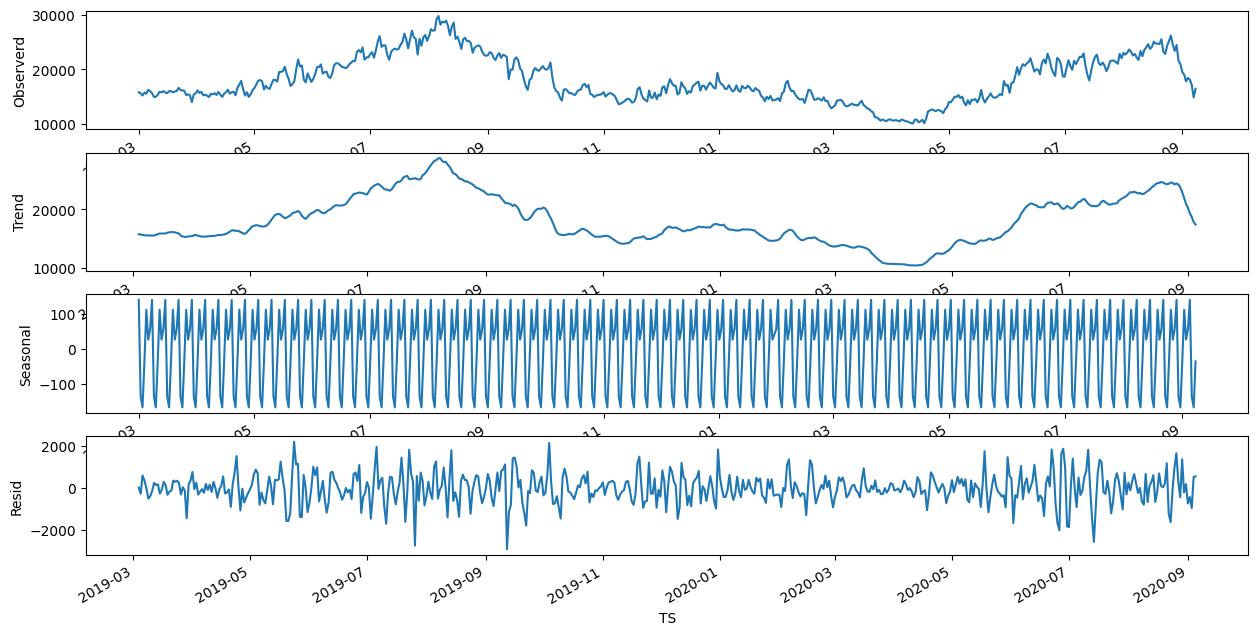

In [21]:
plot_decompose(result_add)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

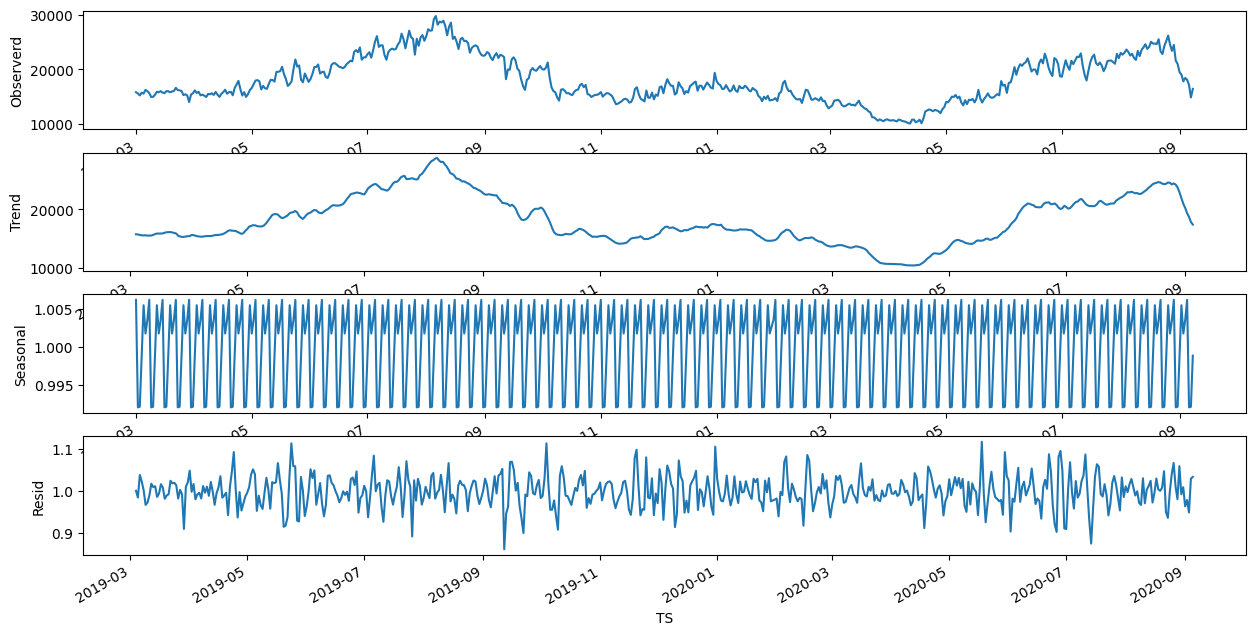

In [23]:
result_mul = seasonal_decompose(series_day, model='multiplicative', period=7)
plot_decompose(result_mul)

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [25]:
df=pd.read_excel('AAA.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [26]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [27]:
df.index = pd.to_datetime(df.index)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 558 entries, 2019-03-01 to 2020-09-08
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   558 non-null    float64
dtypes: float64(1)
memory usage: 8.7 KB


In [30]:
df=df.resample(rule='D').sum()

In [33]:
#df.drop(['Dates'], axis=1, inplace=True)
df.drop(df.index[557], inplace=True)

In [ ]:
df.head()

In [34]:
result = seasonal_decompose(df['Value'], model='multiplicative')

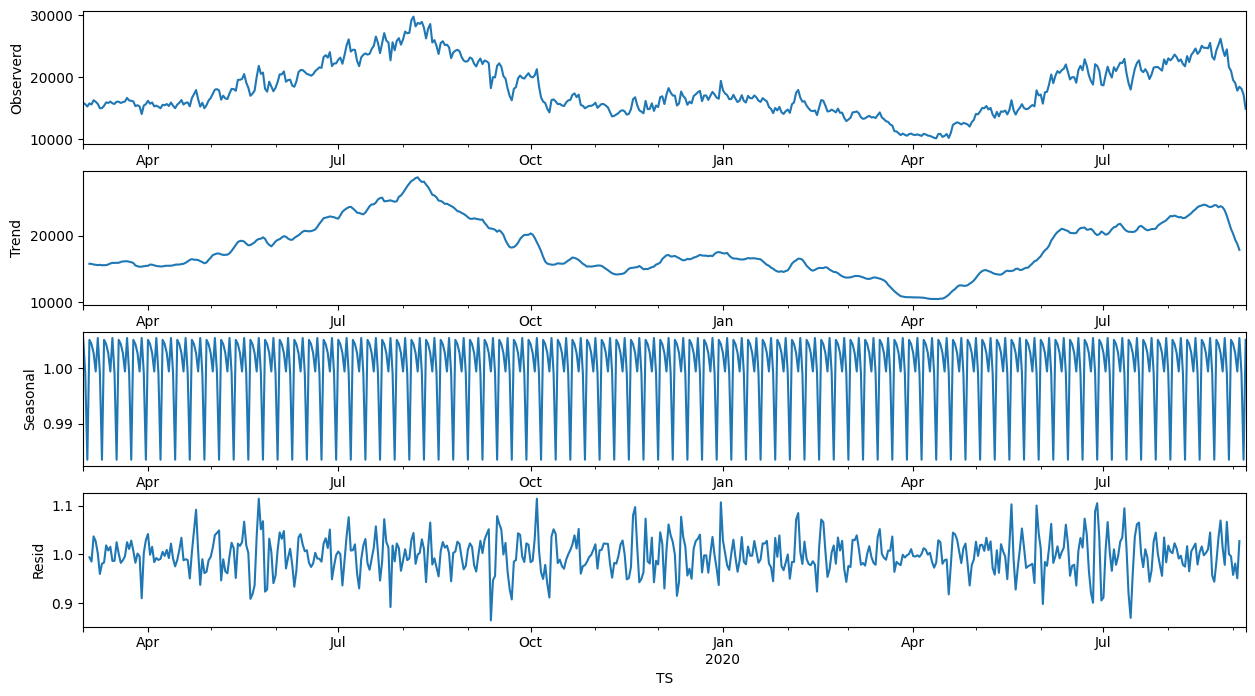

In [35]:
plot_decompose(result)